In [1]:
import sys
import numpy as np
import pandas as pd
import scipy as sp
import sklearn
import mglearn
import matplotlib.pyplot as plt

#  Uncertainty Estimates from Classifiers
- scikit-learn has ability of its classifiers to provide uncertay estimates of predictions
- scikit-learn offers two popular uncertainty estimates from classifiers:
1. decision_function
2. predict_proba


In [2]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.datasets import make_blobs, make_circles
from sklearn.model_selection import train_test_split

X,y = make_circles(noise=0.25, factor=0.5, random_state=1)

y_named = np.array(["blue", "red"])[y]
X_train, X_test, y_train_named, y_test_named, y_train, y_test = train_test_split(X, y_named, y, random_state=0)

gbrt = GradientBoostingClassifier(random_state=0)
gbrt.fit(X_train, y_train_named)

GradientBoostingClassifier(random_state=0)

## The Decision Function
- in binary classidication case, the return value of decision_function is of shape (n_samples,), and it returns one floaring-point number for each sample
- positive values indicate a preference for the "positive" class, whille negative values indicate a preference for the "negative" (or other) class
- the range of *decision_function* can be arbitrary , and depends on the data and the model parameters

In [3]:
print("X_test.shape: {}".format(X_test.shape))
print("Decision function shape: {}".format(
    gbrt.decision_function(X_test).shape)
)

print("Decision function:\n{}".format(gbrt.decision_function(X_test)[:6]))

X_test.shape: (25, 2)
Decision function shape: (25,)
Decision function:
[ 4.13592603 -1.70169917 -3.95106099 -3.62609552  4.28986642  3.66166081]


In [4]:
# recover the prediction by looking only at the sign of the decision function
print("Thresholded decision function:\n{}".format(
    gbrt.decision_function(X_test) > 0
))
print("Predictions:\n{}".format(gbrt.predict(X_test)))

Thresholded decision function:
[ True False False False  True  True False  True  True  True False  True
  True False  True False False False  True  True  True  True  True False
 False]
Predictions:
['red' 'blue' 'blue' 'blue' 'red' 'red' 'blue' 'red' 'red' 'red' 'blue'
 'red' 'red' 'blue' 'red' 'blue' 'blue' 'blue' 'red' 'red' 'red' 'red'
 'red' 'blue' 'blue']


In [5]:
greater_zero = (gbrt.decision_function(X_test) > 0).astype(int)
pred = gbrt.classes_[greater_zero]
print("pred is equal to predictions: {}".format(
    np.all(pred == gbrt.predict(X_test))
))

pred is equal to predictions: True


In [6]:
# arbitrary range of decision_function depends on the data and model parameters
decision_function = gbrt.decision_function(X_test)
print("Decision function minimum: {:.2f} maximum: {:.2f}".format(
    np.min(decision_function), np.max(decision_function)
))

Decision function minimum: -7.69 maximum: 4.29


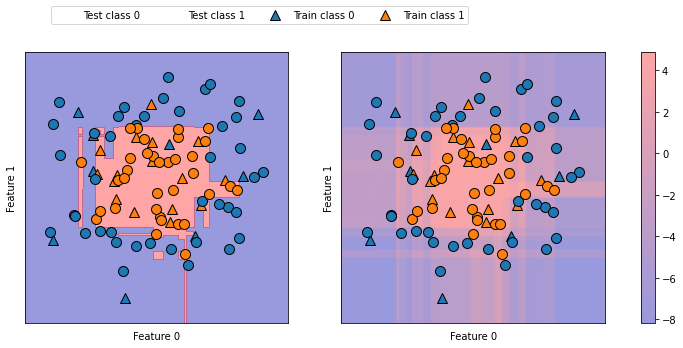

In [7]:
# vizualize the decision boundary
fig, axes = plt.subplots(1, 2, figsize=(13,5))
mglearn.tools.plot_2d_separator(gbrt, X, ax=axes[0], alpha=0.4,
    fill=True, cm=mglearn.cm2)
scores_image = mglearn.tools.plot_2d_scores(gbrt, X, ax=axes[1],
    alpha=0.4, cm=mglearn.ReBl)


for ax in axes:
    mglearn.discrete_scatter(X_test[:,0], X_test[:,1], y_test, markers='^', ax=ax)
    mglearn.discrete_scatter(X_train[:,0], X_train[:,1], y_train, markers='o', ax=ax)
    ax.set_xlabel("Feature 0")
    ax.set_ylabel("Feature 1")

cbar = plt.colorbar(scores_image, ax=axes.tolist())
axes[0].legend(["Test class 0", "Test class 1", "Train class 0", "Train class 1"], ncol=4, loc=(.1, 1.1))

## Predicting Probabilities

- predict_proba is a probability for each class, and is more easily understood than the out put of decision_function.
- takes the shape (n_samples, 2) for binary classification

In [9]:
print("Shape of probabilityies: {}".format(gbrt.predict_proba(X_test).shape))

print("Predicted probabilities:\n {}".format(
    gbrt.predict_proba(X_test[:6])
))

Shape of probabilityies: (25, 2)
Predicted probabilities:
 [[0.01573626 0.98426374]
 [0.84575653 0.15424347]
 [0.98112869 0.01887131]
 [0.97407033 0.02592967]
 [0.01352142 0.98647858]
 [0.02504637 0.97495363]]


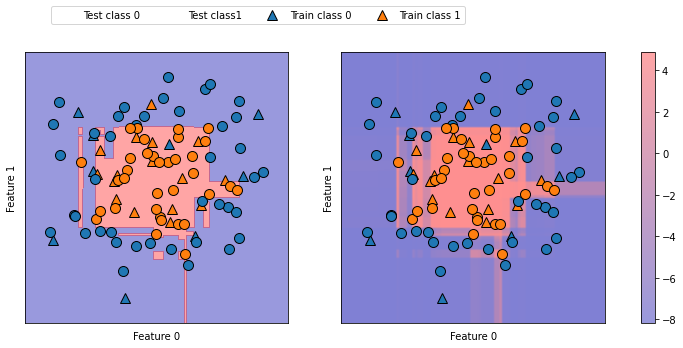

In [11]:
fig, axes = plt.subplots(1,2, figsize=(13,5))
mglearn.tools.plot_2d_separator(
    gbrt, X, ax=axes[0], alpha=.4, fill=True, cm=mglearn.cm2
)
score_image = mglearn.tools.plot_2d_scores(
    gbrt, X, ax=axes[1], alpha=.5, cm=mglearn.ReBl, function='predict_proba'
)

for ax in axes:
    mglearn.discrete_scatter(X_test[:,0], X_test[:,1], y_test, markers='^', ax=ax)
    mglearn.discrete_scatter(X_train[:,0], X_train[:,1], y_train, markers='o', ax=ax)
    ax.set_xlabel("Feature 0")
    ax.set_ylabel("Feature 1")
cbar = plt.colorbar(scores_image, ax=axes.tolist())
axes[0].legend(["Test class 0", "Test class1", "Train class 0", "Train class 1"], ncol=4, loc=(.1, 1.1 ))

classifier comparison to illustrate nature of decision boundaries:
- https://scikit-learn.org/stable/auto_examples/classification/plot_classifier_comparison.html

# Uncertainty in Multiclass Classification